In [1]:
import numpy as np
from activation import ActivationReLU
from layer import LayerDense
from nnfs.datasets import spiral_data
import nnfs

nnfs.init()

## Activation Functions

The activation function is applied to the output of a neuron (or layer of neurons) which modifies the output. If the activation function is nonlinear, it allows for neural networks with usually two or more hidden layers to map non linear functions. A neural network will generally have 2 types of activation functions, 1 used for the hidden layers, and 1 for the output layer.

### Step Activation Function
Values greater than 0 will fire (1), values less than or equal to 0 will not (0). This activation function is rarely used.

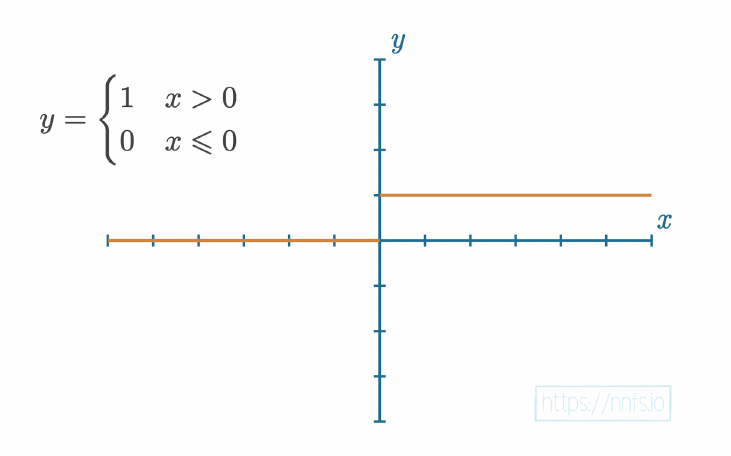

### Linear Activation Function
A linear activation function is simply an equation of a line. This activation function is usually applied to the last layers output in the case of a regression model.

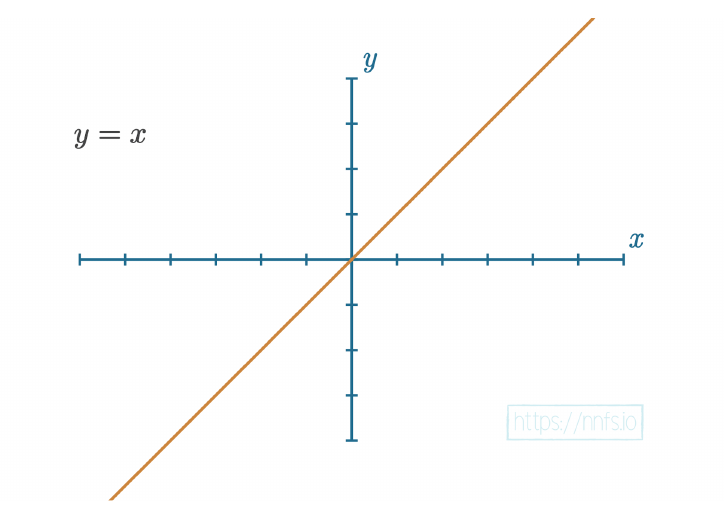

### Sigoid Activation Function
The problem with a step function is its less clear to the optimizer what the impacts are of the weights and biases (its either 1 or 0). A more granular activation function is the sigmoid function

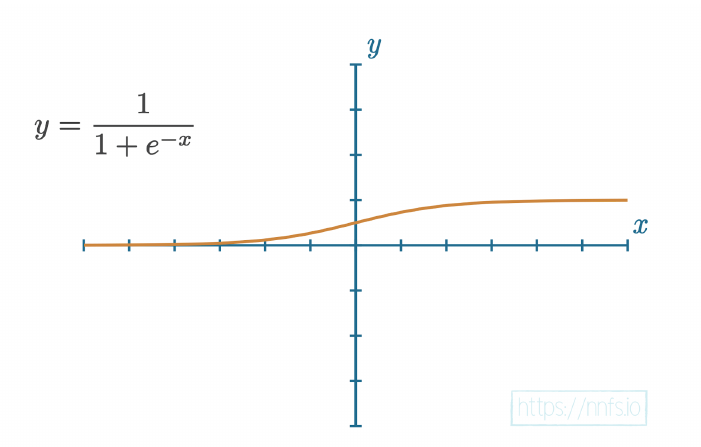

### Rectified Linear Activation Function
Simplilar than the sigmoid, it is simply $y=x$ clipped at 0. This is currently the most widley used activation function due to speed and efficiency. The sigmoid function is much more challenging to compute than the ReLU function. This is still a non-linear function due to the bend at 0

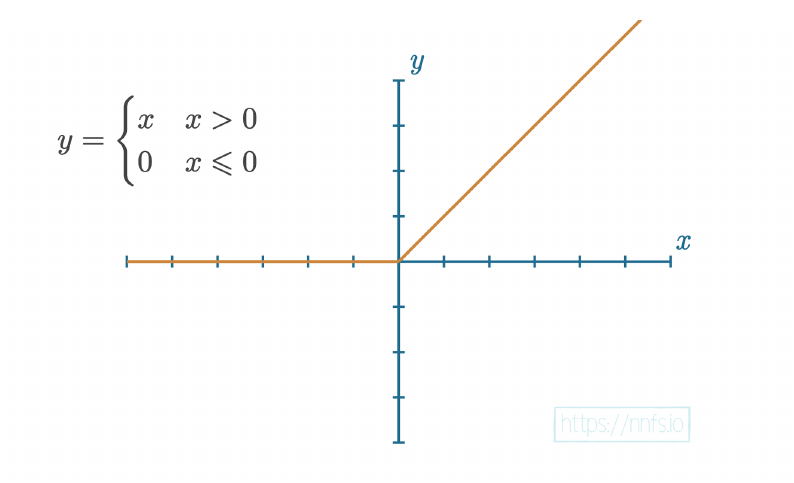

## Why use activation functions
For a neural network to fit a nonlinear function, we need it to contain two or more hidden layers and we need those hidden layers to use a nonlinear activation function. A **nonlinear** function is a function that cannot be represented well by a straight line. Alot of problems in life are nonlinear and neural networks do a good job at solving nonlinear problems.

Neural networks that use linear activation functions can only depict linear relationships. Each neruo in each layer acts linearly, so the entire network is a linear.

## ReLU Activation Function

In [2]:
inputs = [0, 2 -1, 3.3, -2.7, 1.1, 2.2, -100]

outputs = []
for i in inputs:
    outputs.append(max(i, 0))

print(outputs)

[0, 1, 3.3, 0, 1.1, 2.2, 0]


In [3]:
outputs = np.maximum(0, inputs)
print(outputs)

[0.  1.  3.3 0.  1.1 2.2 0. ]


In [4]:
activation = ActivationReLU()
activation.forward(inputs)
print(activation.output)

[0.  1.  3.3 0.  1.1 2.2 0. ]


Applying this to the spiral data:

In [5]:

X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense(2, 3)
dense1.forward(X)

activation1 = ActivationReLU()
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


## Softmax Activation
An activation function meant for classification. The ReLU function is unbounded, not normalized, and exclusive. This means that the output can be anything, and the each output is independent of the others. The softmax activation can take in non-normalized inputs and produce a normailized probability distribution for the classes. In classification problems, we want to see what the network thinks the input represents, so the distribution returned by softmax is the confidence scores for each class (since its a probability distribution, the sum of the scores will be 1)

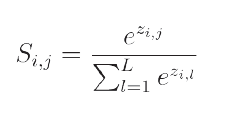

In [6]:
import math

layer_outputs = [4.8, 1.21, 2.385]

exp_values = []
for o in layer_outputs:
    exp_values.append(math.e ** o)
print('exponentiated values:')
print(exp_values)

exponentiated values:
[121.51041751873483, 3.353484652549023, 10.859062664920513]


Exponential value of any number is always non-negative; returns 0 for -inf, 1 for input of 0, and increases positive values. Since exponential is a monotonic funtion, the higher the input values, outputs are also higher so we dont change the predicted classes while still ensuring non-negative outputs

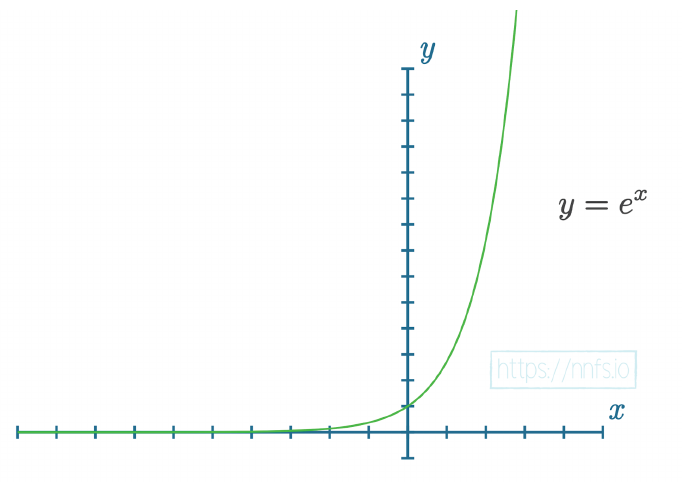

In [7]:
# normalize the values
norm = sum(exp_values)
norm_values = [v / norm for v in exp_values]
print('normalized values:')
print(norm_values)
print('sum: ', sum(norm_values))

normalized values:
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
sum:  0.9999999999999999


Using numpy:

In [8]:
exp_values = np.exp(layer_outputs)
print('exponentiated values:')
print(exp_values)

exponentiated values:
[121.51041752   3.35348465  10.85906266]


In [9]:
norm_values = exp_values / np.sum(exp_values)
print('normalized values:')
print(norm_values)
print('sum: ', sum(norm_values))

normalized values:
[0.89528266 0.02470831 0.08000903]
sum:  0.9999999999999999


In [10]:
from activation import ActivationSoftmax

softmax = ActivationSoftmax()
softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [11]:
softmax.forward([[-2, -1, 0]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


These are the same because we subtract the largest from all of the inputs to put the input range to (-inf, 0).

To determine the classification the model has made, we need to take an **argmax** on the outputs. This returns the index of the output with the highest confidence score. The confidence score is also important as the argmax will return index 1 for both `[0.22, 0.6, 0.18]` and `[0.32, 0.36, 0.32]` but the first has a much higher confidence